## Tranformers Pipeline Work Example

In [1]:
!pip install transformers[sentencepiece]

     |████████████████████████████████| 3.3 MB 7.5 MB/s 
     |████████████████████████████████| 895 kB 74.5 MB/s 
     |████████████████████████████████| 3.3 MB 46.9 MB/s 
     |████████████████████████████████| 596 kB 40.0 MB/s 
     |████████████████████████████████| 61 kB 585 kB/s 
     |████████████████████████████████| 1.2 MB 61.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier([
            "Today is a gloomy day!",
            "If you don't make your unconscious consious, It will direct your life and you will call it fate"
])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

[{'label': 'NEGATIVE', 'score': 0.9707778692245483},
 {'label': 'POSITIVE', 'score': 0.9889637231826782}]

## Inside the pipeline 

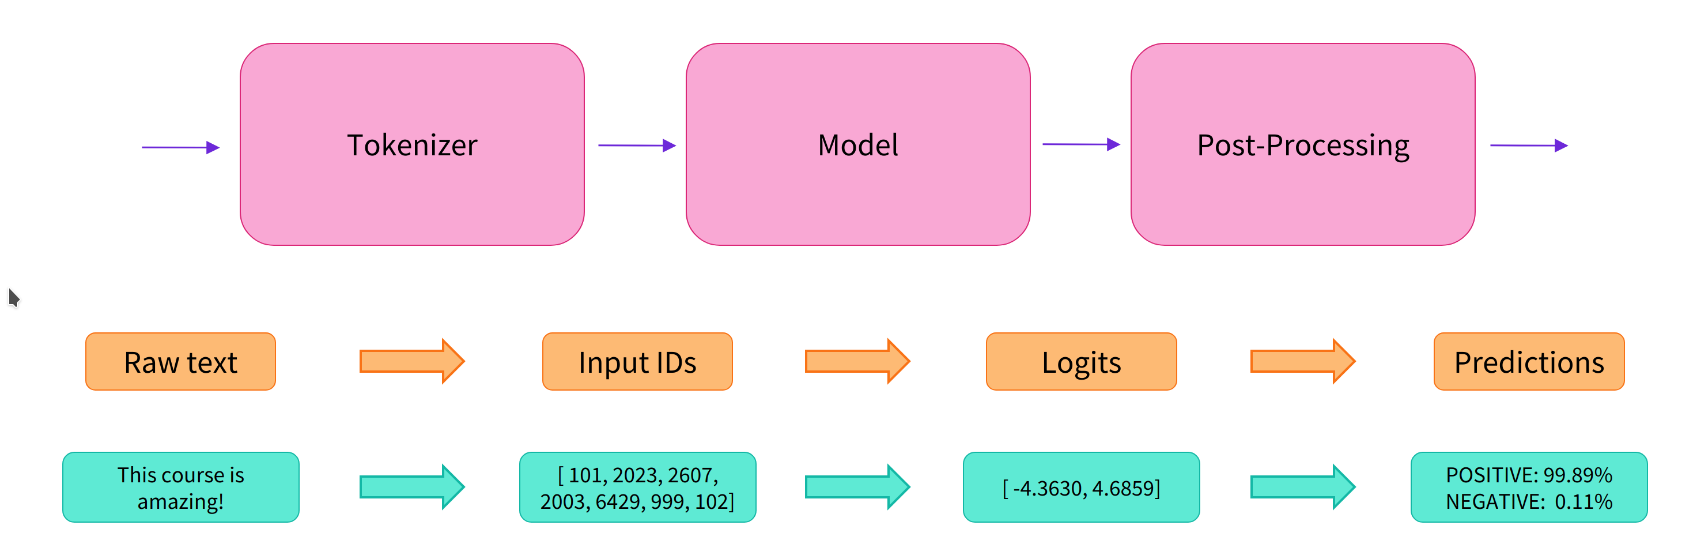


## Data Preprocessing with `tokenizer`

In [3]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

print(type(tokenizer))
print(tokenizer)



<class 'transformers.models.distilbert.tokenization_distilbert_fast.DistilBertTokenizerFast'>
PreTrainedTokenizerFast(name_or_path='distilbert-base-uncased-finetuned-sst-2-english', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})


In [4]:
raw_inputs = [
              "Today is a gloomy day!",
            "If you don't make your unconscious consious, It will direct your life and you will call it fate"
              
]

inputs = tokenizer(raw_inputs,padding=True,truncation=True,return_tensors='pt')
print(inputs)


{'input_ids': tensor([[  101,  2651,  2003,  1037, 24067,  2100,  2154,   999,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0],
        [  101,  2065,  2017,  2123,  1005,  1056,  2191,  2115,  9787,  9530,
         20763,  2271,  1010,  2009,  2097,  3622,  2115,  2166,  1998,  2017,
          2097,  2655,  2009,  6580,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1]])}


## Creating logits with model (pretrained)

In [5]:
from transformers import AutoModel

model = AutoModel.from_pretrained(checkpoint)
model

Some weights of the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing DistilBertModel: ['pre_classifier.bias', 'pre_classifier.weight', 'classifier.bias', 'classifier.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0): TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(i

In [6]:
outputs = model(**inputs)
type(outputs)
print(outputs.keys())

odict_keys(['last_hidden_state'])


In [7]:
outputs['last_hidden_state'].shape , outputs.last_hidden_state.shape

(torch.Size([2, 25, 768]), torch.Size([2, 25, 768]))

In [8]:
outputs

BaseModelOutput([('last_hidden_state',
                  tensor([[[-0.2040,  0.3358, -0.0837,  ..., -0.1274,  0.3075,  0.0812],
                           [-0.7894,  0.6502, -0.3222,  ..., -0.6797, -0.0602, -0.1202],
                           [-0.6403,  0.5376, -0.2280,  ..., -0.4182, -0.0360,  0.5429],
                           ...,
                           [-0.0855,  0.5077,  0.0031,  ...,  0.0708,  0.2881, -0.0727],
                           [-0.1152,  0.4230,  0.0279,  ...,  0.1334,  0.2865, -0.0284],
                           [-0.2763,  0.4695, -0.0494,  ..., -0.0154,  0.2441,  0.1718]],
                  
                          [[ 0.4971,  0.6587, -0.0580,  ..., -0.2746,  0.4077,  0.0257],
                           [ 0.2539,  0.7415, -0.0586,  ..., -0.7526, -0.2424, -0.3021],
                           [-0.0254,  0.2917,  0.0991,  ...,  0.1032,  0.2132, -0.1540],
                           ...,
                           [ 0.4506,  0.5641, -0.3133,  ..., -0.3444,  0.639

## for sequence classification 

In [10]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

outputs = model(**inputs)

In [15]:
outputs

SequenceClassifierOutput([('logits', tensor([[ 1.8628, -1.6404],
                                   [-2.2454,  2.2501]], grad_fn=<AddmmBackward0>))])

In [17]:
outputs.logits.shape

torch.Size([2, 2])

In [19]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits,dim = -1)
print(predictions)

tensor([[0.9708, 0.0292],
        [0.0110, 0.9890]], grad_fn=<SoftmaxBackward0>)


In [20]:
model.config

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased-finetuned-sst-2-english",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.13.0",
  "vocab_size": 30522
}

In [21]:
model.config.label2id

{'NEGATIVE': 0, 'POSITIVE': 1}